# <center> The relation between electric vehicles and air quality in New York City </center>

<center>Student names: Joep Minke (13535345), Tom Stoltenborg (5975980), Bor Ipema (13977687), Julian van Noortwijk (12578975)</center>   <center>Group: K1</center>


<div>
    <img src="attachment:ny_fog.jpg" alt="NY Fog" width="600" height="400">
</div>


<center> &copy; A smoky haze from wildfires in Canada diminishes the visibility of the Empire State Building, June 7, 2023, in New York / David Dee Delgado </center>

## Introduction

In [16]:
# Imports
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import matplotlib.patches as mpatches
import fiona
import numpy as np
import pandas as pd
import geopandas as gpd
import importnb
from matplotlib import colors
from ipywidgets import interact
from importnb import Notebook
with Notebook():
    import cleaned_data

df1 = cleaned_data.df1
df2 = cleaned_data.df2
df2_copy = cleaned_data.df2_copy
df3 = cleaned_data.df3
df4 = cleaned_data.df4

The increasing concern for environmental sustainability has led to a global shift toward electric vehicles (EVs) as a cleaner transportation alternative. In New York City, where air quality remains a significant challenge, understanding the relationship between EV adoption and air quality in specific districts is crucial. This notebook aims to analyze the impact of EV adoption on air quality within different districts of New York City. By creating visualizations of data on EV's and air quality in New York City, we seek to identify correlations and causal relationships, providing insights on the relation between electric vehicles and air quality.

This notebook explores two contrasting perspectives on the impact of EV usage on air quality: one emphasizing its positive effects and arguing a noticeable increase in air quality and the other highlighting potential limitations that could keep increased EV usage from having making a substantial difference.

Perspectives:

Electric vehicles have a positive impact on the air quality in cities

Electric vehicles have no or an insignificant impact on the air quality in cities


## Datasets and Preprocessing

### Charging Stations
The dataset provides information on the exact locations of electic vehicle (EV)charging stations in the state of New York. It includes details to what EV Network each charging station belongs, as well as the date each charging station was opened.
To clean up the dataset columns were selected based on their relevance to our analysis and after that the dataframe was filtered on the five counties. 
### Air Quality
This dataset provides information on various air pollutans with their corresponding geo location and their measurements in either the summer, winter or the yearly average.  

Since for example Ozone 3 (O3) is not directly emitted but gets generated on warm days with plenty of sunlight, it may not provide accurate insights into the impact of electric vehicles. Additionally, its data is limited to summer measurements only, making it unsuitable for creating a yearly average chart.

By excluding Ozone 3 from the analysis and focusing on NO2 and PM2.5, it is possible to obtain more meaningful results. That is because these pollutants are directly associated with fuel combustion and can help assess the effectiveness of electric vehicles in reducing harmful emissions and improving air quality. 



### Vehicle and boat registrations by fuel type per county
This dataset provides information on vehicle and boat registrations in various counties, categorized by fuel type. The dataset allows for analysis of the distribution of registrations based on different fuel types across different counties.
    
The only vehicle type we're interested in are cars, so for example: boats were dropped. The fuel types were grouped into broader categories. Categories such as 'COMP N/G', 'FLEX', 'OTHER', 'NONE', and 'PROPANE' were combined under the 'OTHER' category. Similarly, 'DIESEL' and 'GAS' were grouped as 'GAS/DIESEL'.

### Electric Vehicles
This dataset provides information about electric vehicles (EVs) registered in various cities and counties within the state of New York. The dataset includes columns such as City, County, and Model Year, allowing for analysis of EV distribution and trends across different geographic regions and model years.

## First perspective

With the increasing concern for environmental sustainability, a global shift towards electric vehicles has been sparked. The advent of electric vehicles, powered by electricity stored in batteries, presents a shift in transportation that has the potential to revolutionize air quality. Unlike the conventional fossile driven vehicles, electriv vehicles (EV's) produce zero tailpipe emissions. The argument can be made that the process of generating the electricity on which EV's run often does produce harmfull gasses, but this happens outside densely populated areas in almost all instances. Therefore EV's should have a positive impact on the air quality in cities, where air quality remains an issue. This argument will be substandiated by looking at new york city, a big and densely populated city with relatively many vehicles.

#### First argument

In [8]:
dftest2 = pd.read_csv("ny_ev_registrations.csv")

dftest2['Registration Valid Date'] = pd.to_datetime(dftest2['Registration Valid Date'])

dftest2.head()

,ZIP Code,Registration Valid Date,DMV ID,Registration,VIN Prefix,Vehicle ID
0,13104,2020-10-01,62,Original,YV4BR0DL7M,18096911
1,13104,2020-10-01,48,Original,YV4BR0DL7M,18096911
2,13104,2020-10-01,46,Original,YV4BR0DL7M,18096911
3,13104,2020-10-01,55,Original,YV4BR0DL7M,18096911
4,13104,2020-10-01,53,Original,YV4BR0DL7M,18096911


For our first argument, we want to compare the registrations of electric vehicles in New York City over the years to the amount of NO2 and Fine Particualte matter in the air of the city over the years. In the first graph, we plotted the registrations of electric vehicles per month over time. As you can see, the sales of electric cars started back in 2014, but starting in 2016 it got a huge increase in sales that kept increasing until halfway through 2021. In the second graph, we plotted the amount of NO2 and Fine Particualte matter in the air of the city over the years, per county. The coloured area's around the lines are for the different area's of the counties in which the measurement was done which have small differences between them. Changing the county in the graph will be used in the second argument. One thing to note for this graph is that for each county, the scale of the y-axis is different, as some counties are a lot let populated than others, resulting in an already better air quality. As you can see, the quality was already getting better over the years but in some years it still got a bit worse. From approximately 2016 it is visible that the quality only got better, and got better more quickly. For the NO2 the change is not that significant, but for the Fine Particulate Matter, which is one of the main polutions of gasoline cars, the drop is really visible. This shows that the increase in electric cars has caused the air quality to become better.

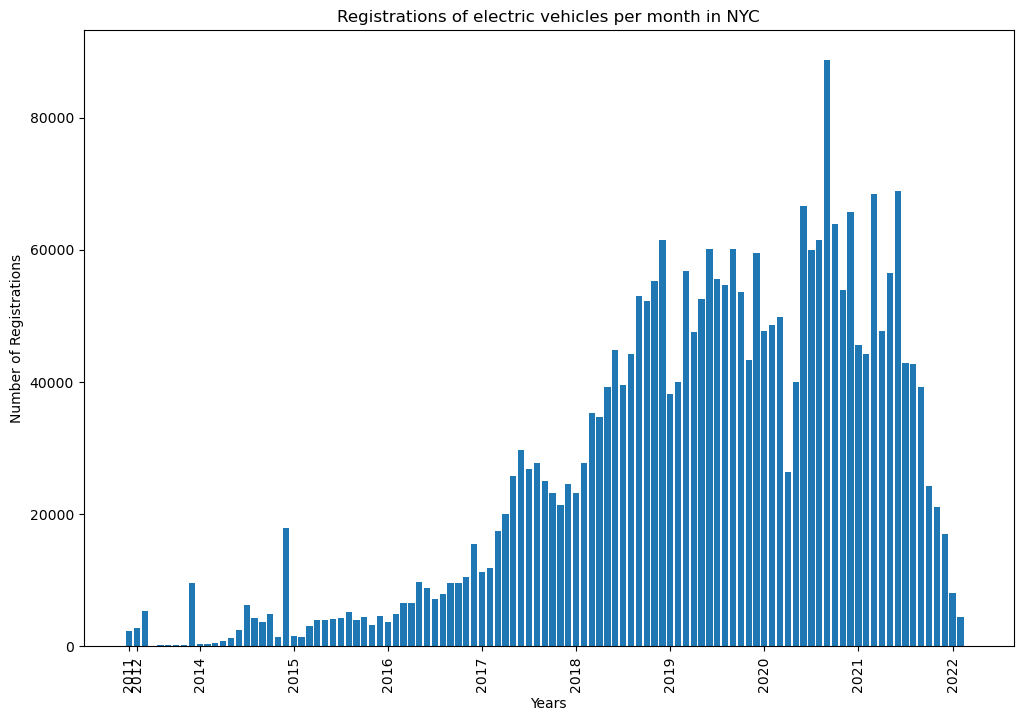

In [9]:
#Plot electric vehicles:

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with a 'Reg Valid Date' column
df = dftest2.copy()

# Convert the 'Reg Valid Date' column to a datetime data type
df['Registration Valid Date'] = pd.to_datetime(df['Registration Valid Date'])

# Extract the year and month from the 'Reg Valid Date' column
df['Year'] = df['Registration Valid Date'].dt.year
df['Month'] = df['Registration Valid Date'].dt.month

# Group the data by year and month and count the number of registrations
registration_counts = df.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Create a new column combining the year and month for labeling purposes
registration_counts['YearMonth'] = registration_counts['Year'].astype(str) + '-' + registration_counts['Month'].astype(str)

# Filter to keep only the first month of each year
first_months = registration_counts[registration_counts['Month'] == 1]

# Set the size of the figure
plt.figure(figsize=(12, 8))

# Plotting the histogram
plt.bar(registration_counts['YearMonth'], registration_counts['Count'])

# Set the x-axis label to 'Years'
plt.xlabel('Years')

# Set the y-axis label to 'Number of Registrations'
plt.ylabel('Number of Registrations')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set the x-axis tick locations and labels to show only the first month of each year
plt.xticks(first_months.index, first_months['Year'])

# Add a title to the plot
plt.title("Registrations of electric vehicles per month in NYC")

# Save the plot as a PNG image
#plt.savefig('registrations.png')

# Show the plot
plt.show()

In [10]:
# Get a list of unique counties
counties = df2_copy['Geo Place Name'].unique()

# Define the colors for each pollution type
colors = ['blue', 'green']

def plot_air_quality(county):
    # Filter the dataframe for the selected county
    county_data = df2_copy[df2_copy['Geo Place Name'] == county]
    
    # Set the figure size
    plt.figure(figsize=(24, 12))

    # Create an empty list to store legend handles and labels
    legend_handles_labels = []

    # Iterate over each pollution type
    for i, pollution_type in enumerate(county_data['Name'].unique(), start=1):
        plt.subplot(1, 2, i)
        pollution_data = county_data[county_data['Name'] == pollution_type]
        line = sns.lineplot(data=pollution_data, x='Time Period', y='Data Value', color=colors[i-1])
        
        # Store legend handles and labels
        legend_handles_labels.append(mpatches.Patch(color=colors[i-1], label=pollution_type))


        plt.title(pollution_type)
        plt.xlabel('Year')
        plt.ylabel('Pollution Level')
        plt.xticks(range(county_data['Time Period'].min(), county_data['Time Period'].max()+1, 2))  # Adjust the x-axis ticks

    # Add a legend to the plot
    plt.legend(legend_handles_labels, county_data['Name'].unique(), title='Pollution Type', loc='upper left')

    # Adjust the spacing between subplots
    plt.tight_layout()
    
    # Save the plot as a PNG image
    #plt.savefig('air-quality.png')

    # Show the plot
    plt.show()

# Interactive county selection
interact(plot_air_quality, county=counties)

interactive(children=(Dropdown(description='county', options=('Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Sta…

<function __main__.plot_air_quality(county)>

For the second argument, we will compare the locations of the EV charging stations to the air quality over time in New York City. In the graph above, we can visualise the amount of NO2 and FPM in the air over time per county. In the graph under this cell, we made a scatterplot of the map of NYC where each datapoint represents a charging station, coloured according to the county it belongs to. We will look at how much the air quality has changed per county compared to the amount of charging stations in that county. As electric vehicles became popular in 2016, we will only look at the data from that time. We will look at the counties in the order of the amount of charging stations it has, in descending order. When you look at the air quality of Manhattan you can see that the parts per million (ppm) of NO2 has dropped by more than 4ppm, and the mcg per cubic meter (mcg/m^3) of FPM has dropped by 2. In Brooklyn, the NO2 dropped by approximately 3.5 ppm and the FPM dropped by 2 mcg/m^3. In the bronx, the NO2 has decreased, but also has seen some increases over the years, only dropping about 2 ppm. The FPM dropped by slightly less than 2 mcg/m^3. In Queens, the NO2 decreased by around 3 ppm, and the FPM by only 1 mcg/m^3. Finally in Staten Island, the NO2 has dropped by 2 ppm and the FPM by around 1.5 mcg/m^3. 

Manhattan and Brooklyn have significantly more charging stations than the other counties, as is clearly visible in the map below. This is also visible in the increase of air quality in these counties, especially when you look at the decrease of NO2 in the air. Brooklyn and Manhattan are the only counties where the ppm of NO2 decreased with more than 3.5. Charging stations are one of the main places to find electric cars, thus more charging stations meaning more electric cars in your county. With this we have shown another reason for why an increase in electric cars has caused the air quality in NYC to become better, making it a more liveable place.

In [11]:
dftest = pd.read_csv("Electric_Vehicle_Charging_Stations_in_New_York.csv")
cities_to_filter = ['New York', 'Brooklyn', 'Staten Island', 'Bronx', 'Queens']
dftest = dftest[dftest['City'].isin(cities_to_filter)]

fig = px.scatter_mapbox(
    dftest,
    lat="Latitude",
    lon="Longitude",
    mapbox_style="carto-positron",
    color="City",
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_layout(title="Locations of charging stations in NYC")

fig.show()


#### Second argument

## Second perspective

#### Fuel emissions caused by traffic are responsible for only a small fraction of all air pollution. 
Considering traffic is responsible for only a fraction of all air pollution, and electric vehicles (EVs) are only a small fraction of all vehicles, it is bold to state that the reduction of nitrogen dioxide (NO2) and particular matter 2.5 (PM2.5) are caused by the increase of EVs. 

#### Second argument
Idea: The relative decrease between 2009 and 2020 concerning particles in the air in each county does not correlate with the relative increase of electric vehicles in each county 

## Reflection

During the project, we explored the correlation between electric vehicles and air quality in New York City (NYC). NYC was selected due to its large size, data availability, and relatively significant number of cars. The project revolved around two distinct perspectives: evaluating whether the impact of electric vehicles was truly beneficial or insignificant. During the proces of the project, we encountered a few obstacles. Initially, our early visualizations lacked creativity and failed to effectively support our arguments from both perspectives. However, in the final week, we found inspiration and successfully generated compelling graphs that aligned well with our viewpoints. Unfortunately, due to communication issues with our TA, we did not receive peer feedback as anticipated. Nevertheless, we did receive limited feedback from another TA. Despite these challenges, the overall process proceeded smoothly. We successfully portrayed the two different perspectives and significantly enhanced our understanding of data visualization and tools like GitHub.

## Work distribution

For the two different perspectives, we divided the group in two. Julian and Bor worked on the first perspective, being 'Electric vehicles have a positive impact on the air quality in cities', and Tom and Joep worked on the second perspective: 'Electric vehicles have no or an insignificant impact on the air quality in cities'. This doesn't mean that the two sides worked separately, but the focus was on their perspective. For example, figure 4, was originally meant to be used in an argument for the first perspective, but turned out to be more usefull for the second one and was eventually used for that one. The general introduction, reflection, work distribution, references and appendix were not assigned to specific team members, but were worked on by everyone. As a team we worked together quite well, often meeting at sciencepark and keeping eachother up to date daily via whatsapp. Generally speaking everyone contributed an equal amount to the end product.

## References

For making the graphs visually more appealing we used ChatGPT to tweak the code for plotting. For some of the preprocessing, like mapping the area's of NYC to the counties in the Air Quality dataset, we also used ChatGPT to do the mapping for us, as it would be a lot of unnecessary work by hand otherwise.

## (Optional) Appendix